# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [8]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine

# Challenge 0 - Import a MySQL table into python:

In this lab, we will twist things up a little. Do you remember your good old friend SQL?
Well, it's time to bring him back and use it in our lab pipeline.

1º- Open the wholesale_customers_data.sql file in MySQL Workbench and run the script into a desired schema.

2º- Create a connection using sqlalchemy from python to mysql and load the table into a variable called *customers*

In [9]:
#Create a connection with create_engine to MySQL Workbench:
import mysql.connector
import getpass
saved_password = getpass.getpass()

In [10]:
cnx = mysql.connector.connect(user='root', password=saved_password, database='lab_unsupervised_learning', port=3306)

In [11]:
cnx.is_connected()

True

In [12]:
cursor = cnx.cursor(buffered=True)

In [14]:
query = ("SELECT * FROM lab_unsupervised_learning.wholesale_customers_data;")
cursor.execute(query)
results = cursor.fetchall()


In [15]:
df = pd.DataFrame(results)

# Challenge 1 - Describe the Dataset

Your already loaded dataset contains information about customer preferences. We will look at how much each customer spends in a year on each subcategory in the grocery store and try to find similarities using clustering.

In case of curiosity, the origin of the dataset is [here](https://archive.ics.uci.edu/ml/datasets/wholesale+customers).

#### Explore the dataset with mathematical and visualization techniques. What do you find?

Checklist:

* What does each column mean?
* Any categorical data to convert?
* Any missing data to remove?
* Column collinearity - any high correlations?
* Descriptive statistics - any outliers to remove?
* Column-wise data distribution - is the distribution skewed?
* Etc.

Additional info: Over a century ago, an Italian economist named Vilfredo Pareto discovered that roughly 20% of the customers account for 80% of the typical retail sales. This is called the [Pareto principle](https://en.wikipedia.org/wiki/Pareto_principle). Check if this dataset displays this characteristic.

In [16]:
# Your code here:
df.head()

,0,1,2,3,4,5,6,7
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [17]:
df.columns = ['Channel', 'Region', 'Fresh', 'Milk', 'Grocery', 'Frozen', 'Detergent_Paper', 'Delicatessen']

In [18]:
df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergent_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [19]:
df.dtypes

Channel            int64
Region             int64
Fresh              int64
Milk               int64
Grocery            int64
Frozen             int64
Detergent_Paper    int64
Delicatessen       int64
dtype: object

In [20]:
df.isnull().sum()

Channel            0
Region             0
Fresh              0
Milk               0
Grocery            0
Frozen             0
Detergent_Paper    0
Delicatessen       0
dtype: int64

In [21]:
correlation_matrix = df.corr()

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

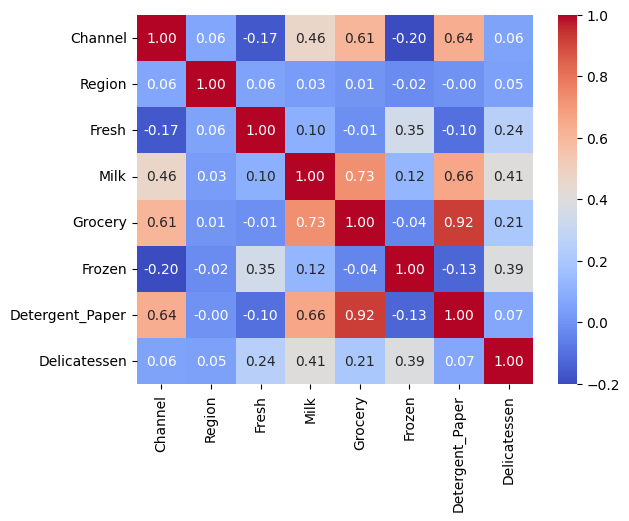

In [23]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [24]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergent_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


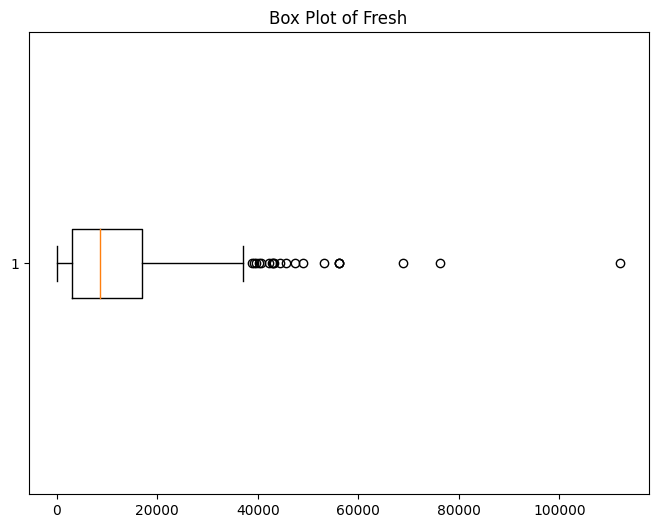

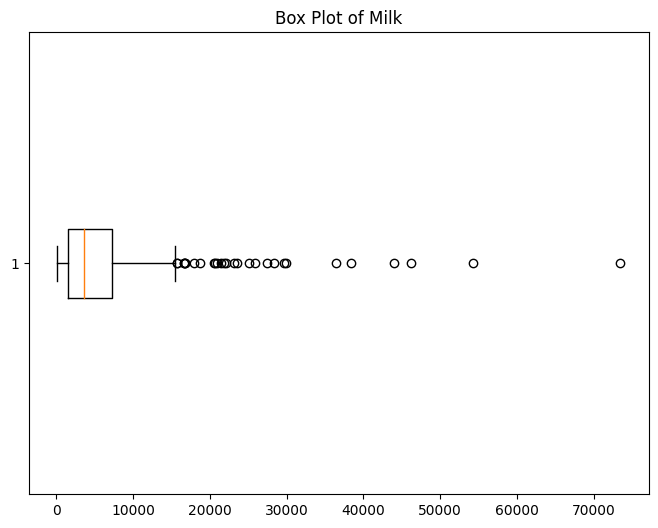

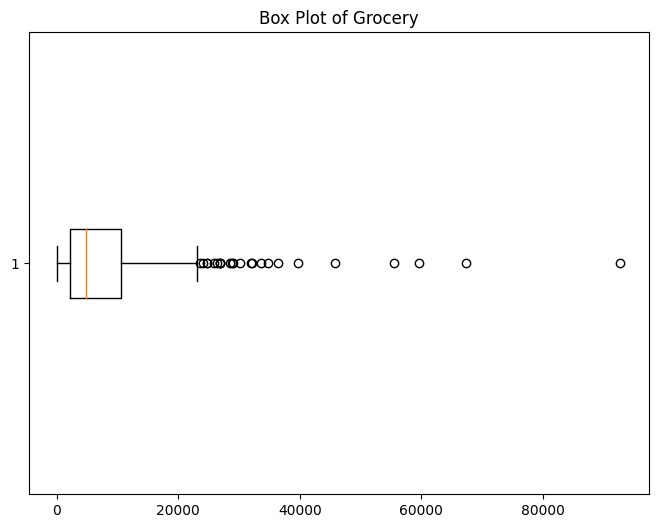

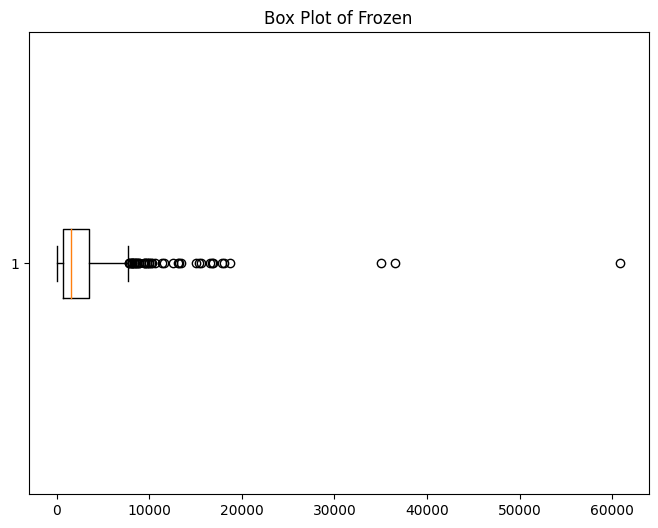

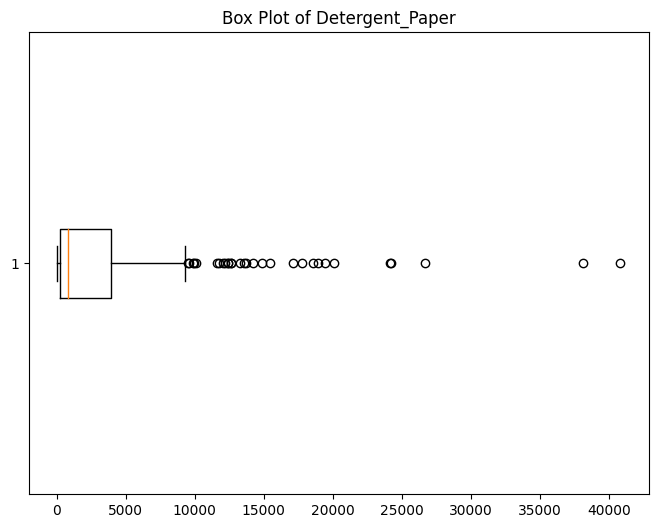

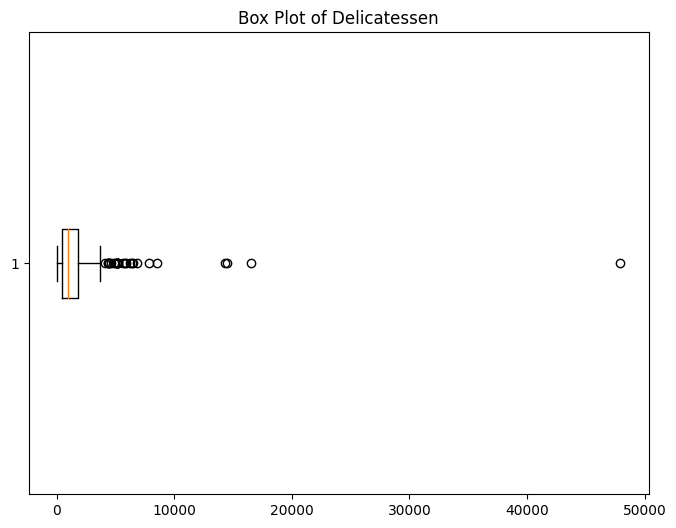

In [42]:
df_continuous = df.drop(['Channel', 'Region'], axis=1)

for column_name in df_continuous.columns:
    plt.figure(figsize=(8, 6))
    plt.boxplot(df[column_name], vert=False)
    plt.title("Box Plot of " + column_name)
    plt.show()

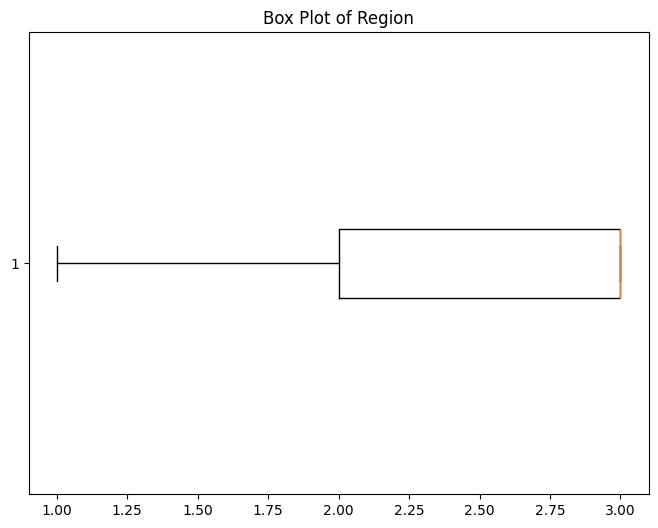

In [29]:
column_name = df.columns[1]

# Create a box plot to visualize potential outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df[column_name], vert=False)
plt.title("Box Plot of " + column_name)
plt.show()

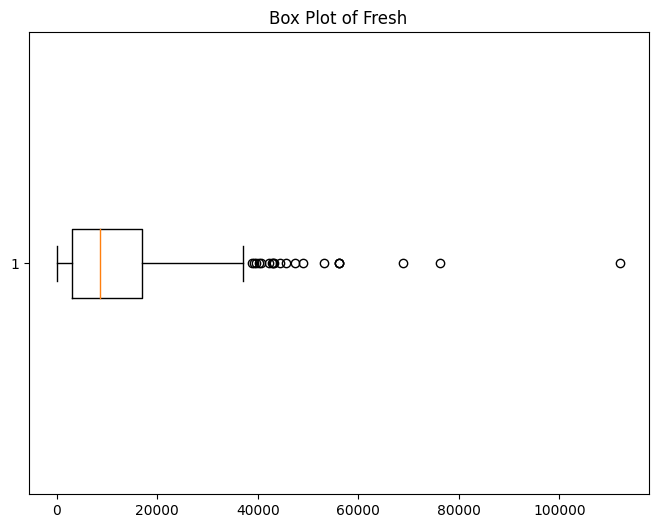

In [30]:
column_name = df.columns[2]

# Create a box plot to visualize potential outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df[column_name], vert=False)
plt.title("Box Plot of " + column_name)
plt.show()

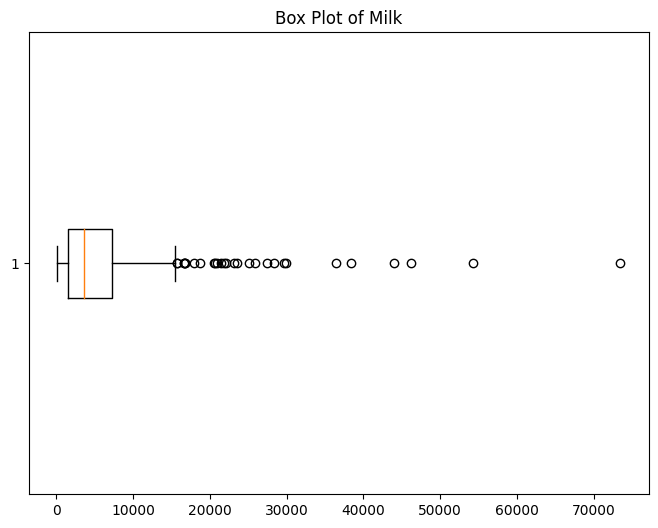

In [31]:
column_name = df.columns[3]

# Create a box plot to visualize potential outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df[column_name], vert=False)
plt.title("Box Plot of " + column_name)
plt.show()

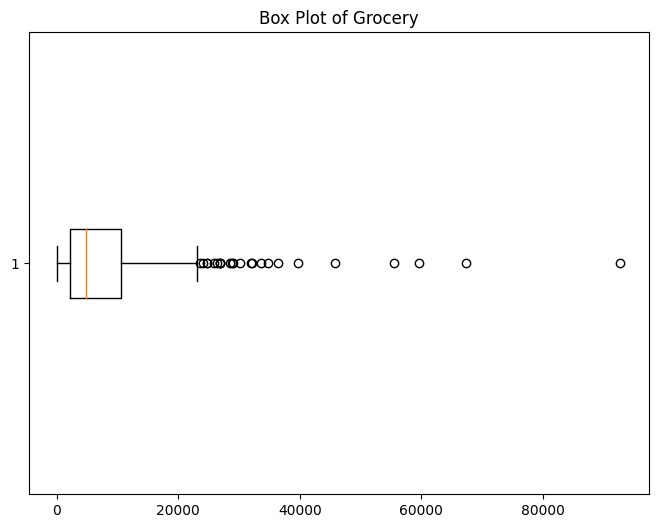

In [32]:
column_name = df.columns[4]

# Create a box plot to visualize potential outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df[column_name], vert=False)
plt.title("Box Plot of " + column_name)
plt.show()

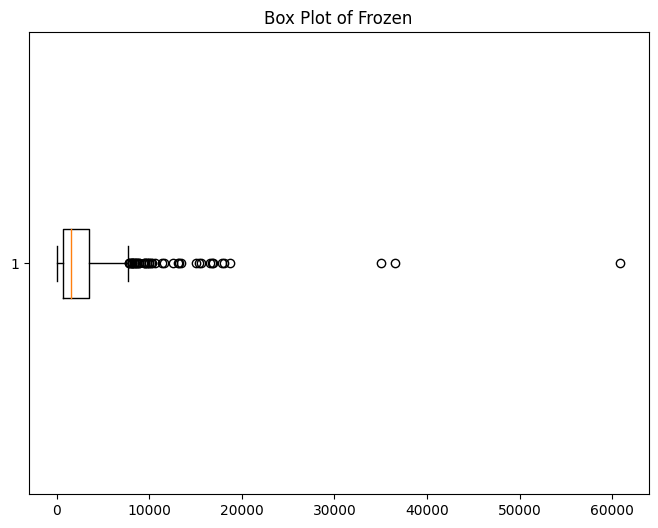

In [33]:
column_name = df.columns[5]

# Create a box plot to visualize potential outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df[column_name], vert=False)
plt.title("Box Plot of " + column_name)
plt.show()

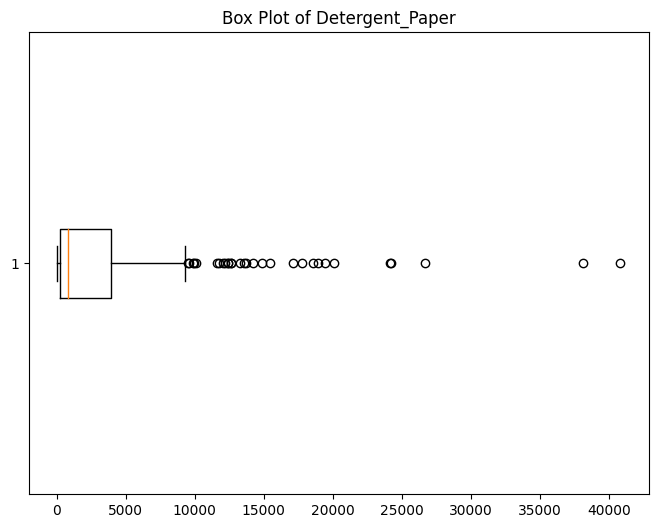

In [34]:
column_name = df.columns[6]

# Create a box plot to visualize potential outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df[column_name], vert=False)
plt.title("Box Plot of " + column_name)
plt.show()

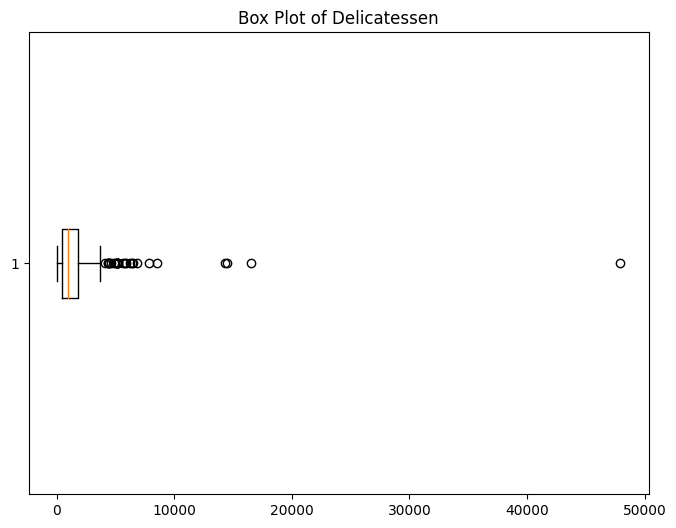

In [35]:
column_name = df.columns[7]

# Create a box plot to visualize potential outliers
plt.figure(figsize=(8, 6))
plt.boxplot(df[column_name], vert=False)
plt.title("Box Plot of " + column_name)
plt.show()


Skewness of Fresh: 2.5525826879071585


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


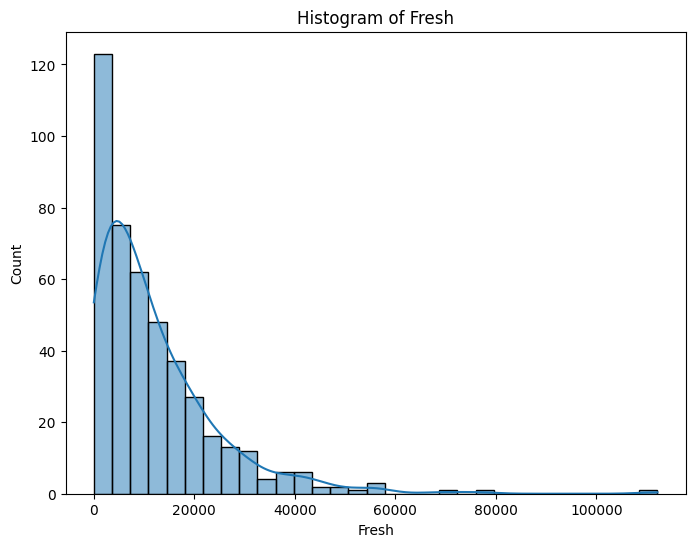


Skewness of Milk: 4.039922122788577


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


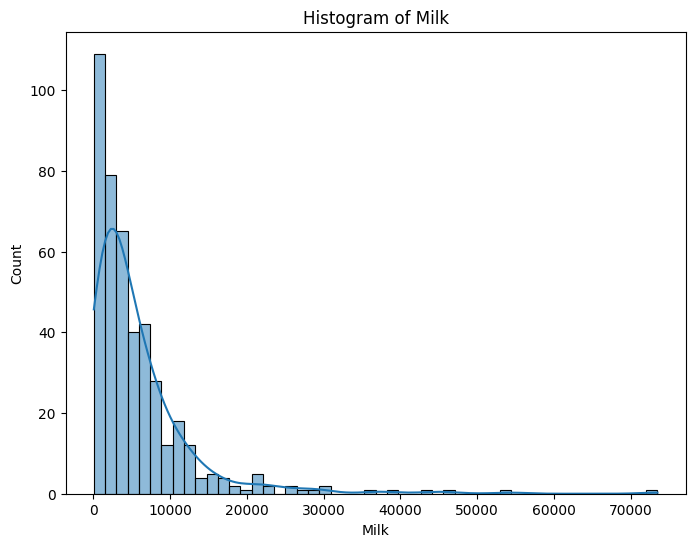


Skewness of Grocery: 3.5751872200807875


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


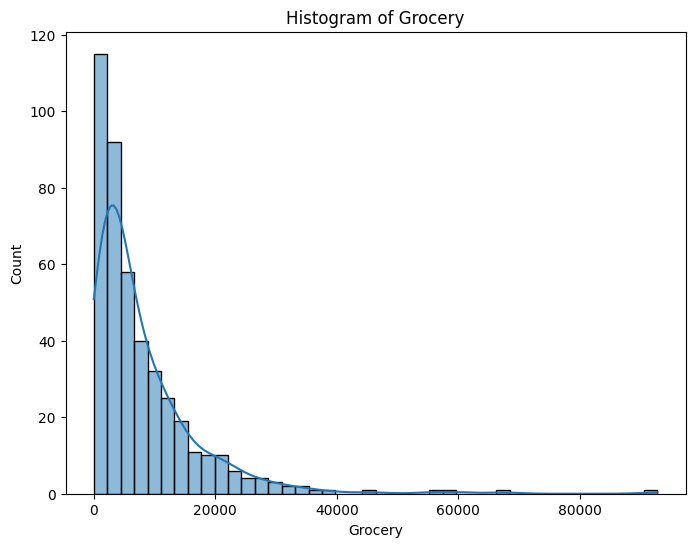


Skewness of Frozen: 5.887825728957787


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


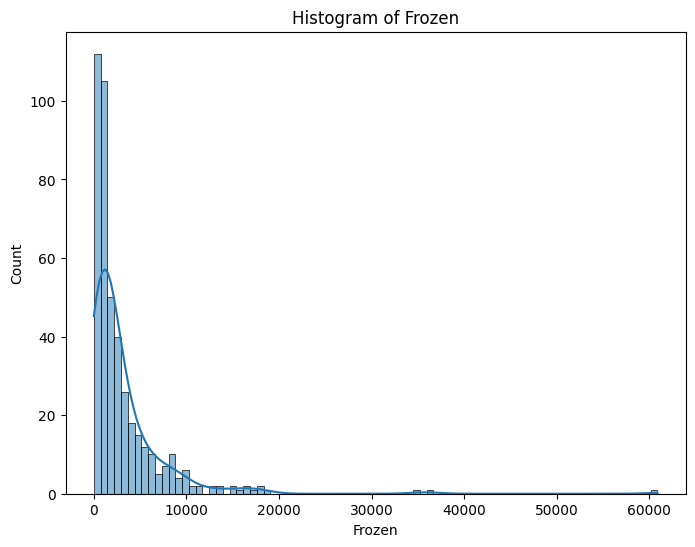


Skewness of Detergent_Paper: 3.6194575783115934


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


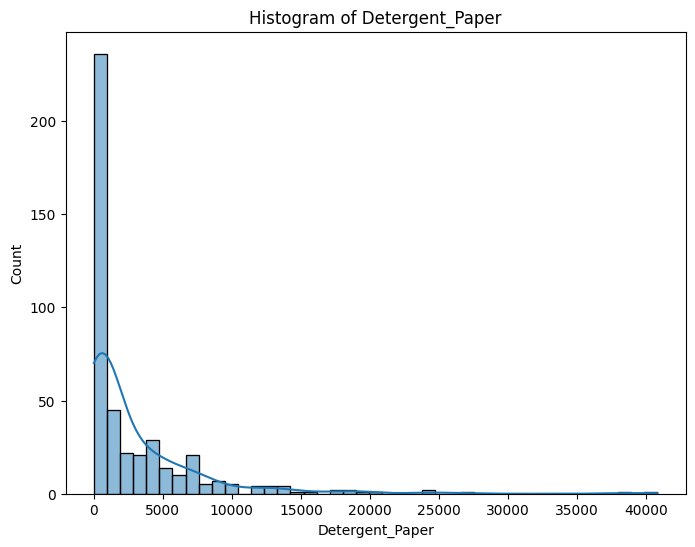


Skewness of Delicatessen: 11.113533648709097


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


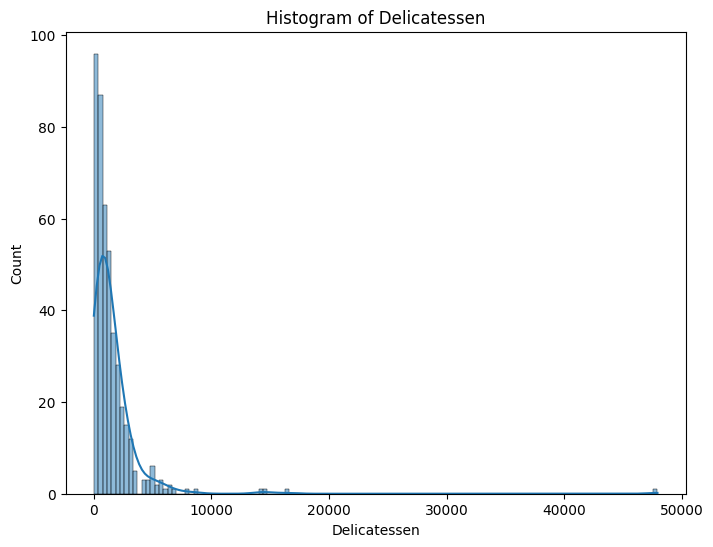

In [41]:
from scipy.stats import skew

df_continuous = df.drop(['Channel', 'Region'], axis=1)

for column_name in df_continuous.columns:
    skeweness = skew(df[column_name])

    print(f"\nSkewness of {column_name}: {skeweness}")

    plt.figure(figsize=(8, 6))
    sns.histplot(df[column_name], kde=True)
    plt.title(f"Histogram of {column_name}")
    plt.show()  


In [ ]:
# Your observations here

# What does each column mean?
# 1)	FRESH: annual spending (m.u.) on fresh products (Continuous);
# 2)	MILK: annual spending (m.u.) on milk products (Continuous);
# 3)	GROCERY: annual spending (m.u.)on grocery products (Continuous);
# 4)	FROZEN: annual spending (m.u.)on frozen products (Continuous)
# 5)	DETERGENTS_PAPER: annual spending (m.u.) on detergents and paper products (Continuous) 
# 6)	DELICATESSEN: annual spending (m.u.)on and delicatessen products (Continuous); 
# 7)	CHANNEL: customersâ€™ Channel - Horeca (Hotel/Restaurant/CafÃ©) or Retail channel (Nominal)
# 8)	REGION: customersâ€™ Region â€“ Lisnon, Oporto or Other (Nominal)

#Any categorical data to convert?
# No, all the data is numerical

#Any missing values?
#No missing values

# Column collinearity - any high correlations?
# Only for grocery and detergent_paper

# Descriptive statistics - any outliers to remove?
#Yes, all the columns with numerical continuous data have outliers

# Column-wise data distribution - is the distribution skewed?
#Yes, all the columns with numerical continuous data are right skewed

# Challenge 2 - Data Cleaning and Transformation

If your conclusion from the previous challenge is the data need cleaning/transformation, do it in the cells below. However, if your conclusion is the data need not be cleaned or transformed, feel free to skip this challenge. But if you do choose the latter, please provide rationale.


Skewness of Fresh after removing outliers: 0.8295831738063694


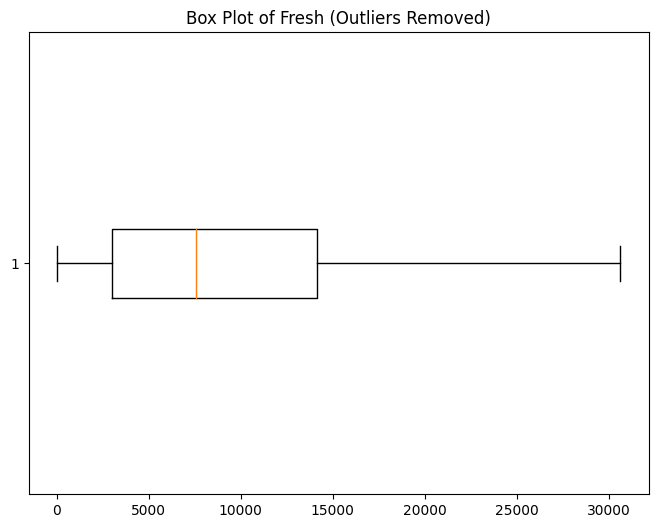


Skewness of Milk after removing outliers: 0.9068546653781607


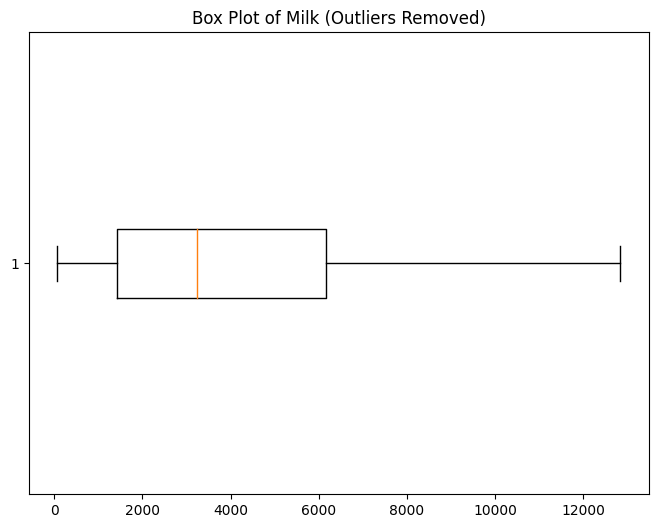


Skewness of Grocery after removing outliers: 1.0118638698390117


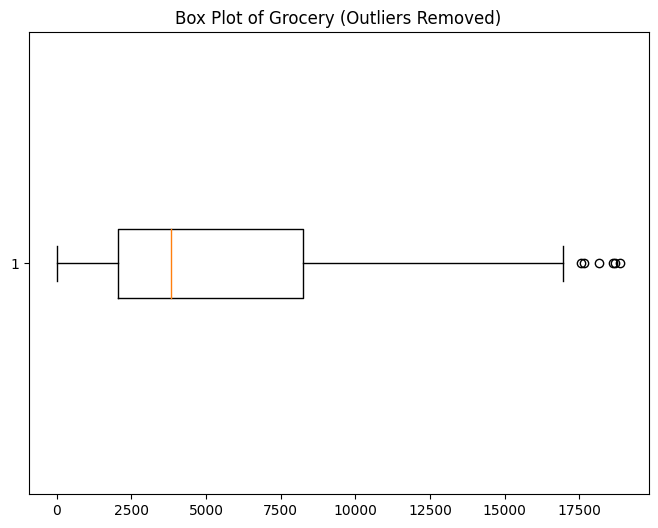


Skewness of Frozen after removing outliers: 1.142207990246026


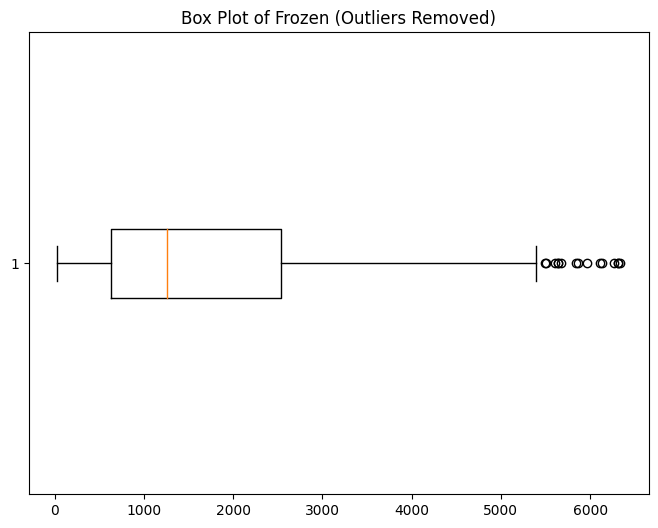


Skewness of Detergent_Paper after removing outliers: 1.3571387041724075


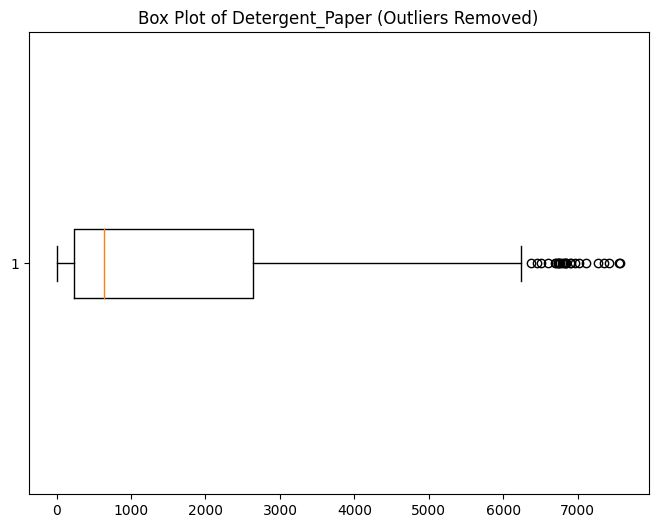


Skewness of Delicatessen after removing outliers: 0.8115238216113654


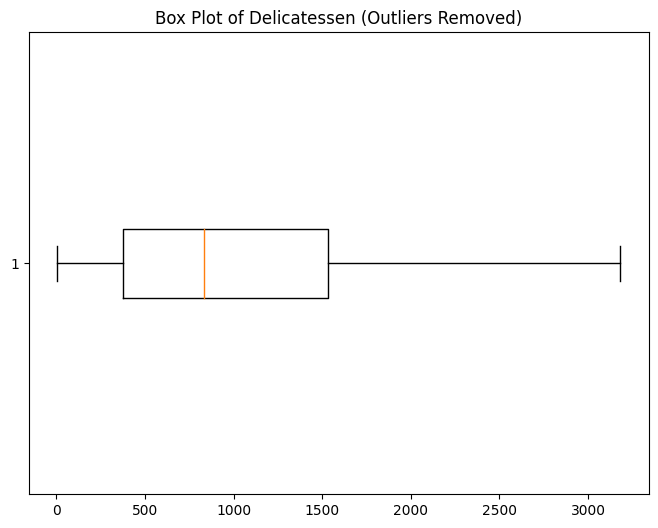

In [53]:
# Your code here
df_continuous = df.drop(['Channel', 'Region'], axis=1)

for column_name in df_continuous.columns:
    Q1 = df[column_name].quantile(0.25)
    Q3 = df[column_name].quantile(0.75)
    IQR = Q3 - Q1
    outlier_threshold = 1.0 

    filtered_data = df[(df[column_name] >= (Q1 - outlier_threshold * IQR)) & (df[column_name] <= (Q3 + outlier_threshold * IQR))]
    filtered_skewness = skew(filtered_data[column_name])
    print(f"\nSkewness of {column_name} after removing outliers: {filtered_skewness}")

    plt.figure(figsize=(8, 6))
    plt.boxplot(filtered_data[column_name], vert=False)
    plt.title("Box Plot of " + column_name + " (Outliers Removed)")
    plt.show()



In [54]:
# Your comment here
transformed_data = np.log1p(filtered_data)
for column_name in filtered_data.columns:
    transformed_skewness = skew(transformed_data[column_name])
    print(f"\nSkewness of {column_name} after log transformation: {transformed_skewness}")



Skewness of Channel after log transformation: 0.8036236123502454

Skewness of Region after log transformation: -1.3912460997312195

Skewness of Fresh after log transformation: -1.5813173309647675

Skewness of Milk after log transformation: -0.3166825883478625

Skewness of Grocery after log transformation: -0.7061194902019036

Skewness of Frozen after log transformation: -0.3800815642494087

Skewness of Detergent_Paper after log transformation: -0.22044928597125782

Skewness of Delicatessen after log transformation: -1.5658744393960284


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


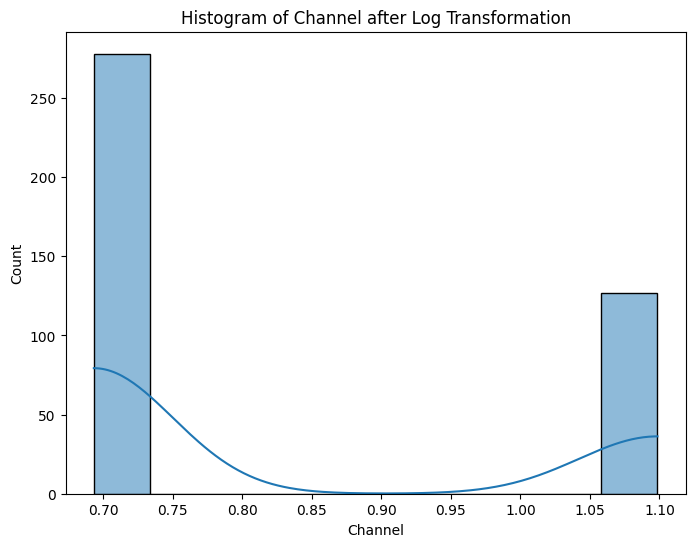

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


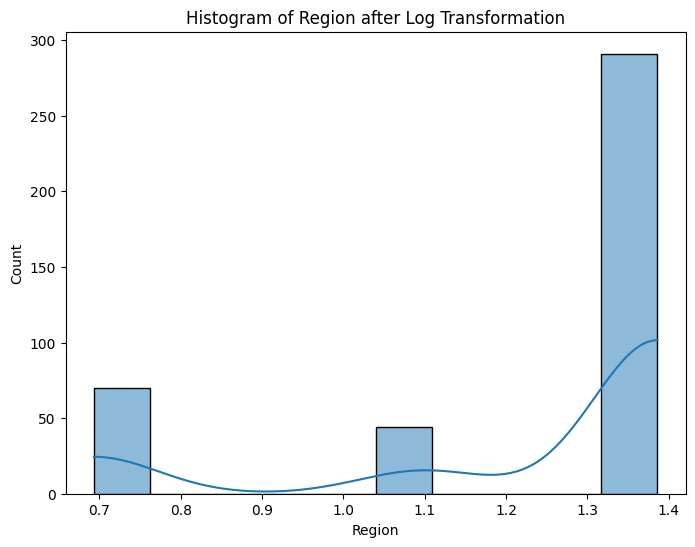

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


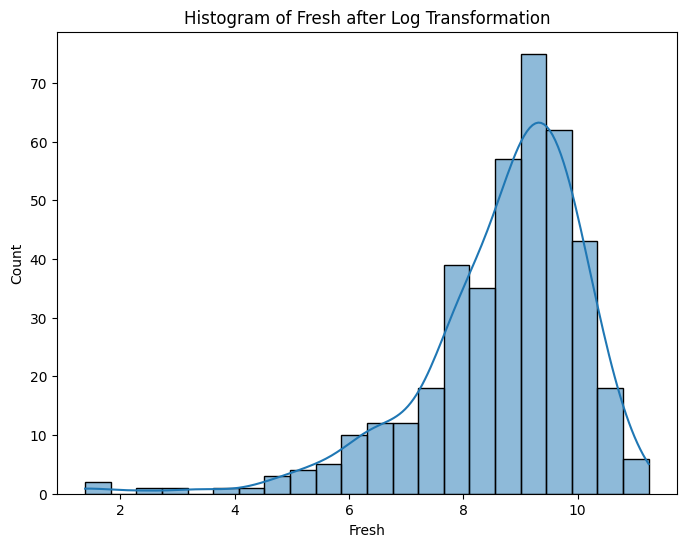

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


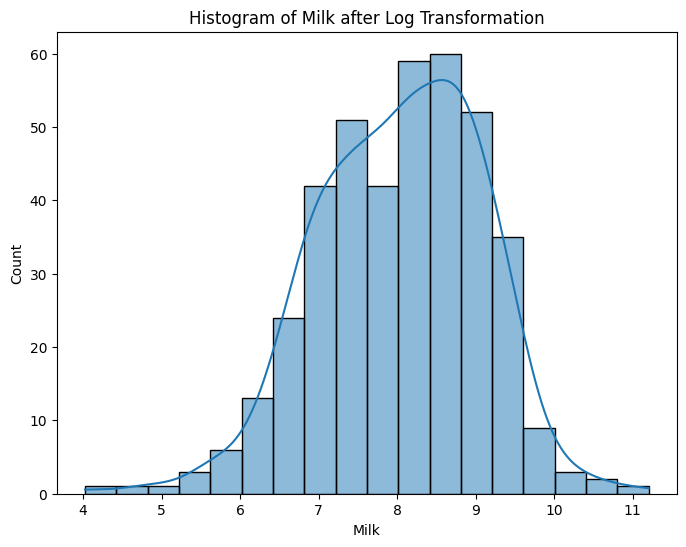

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


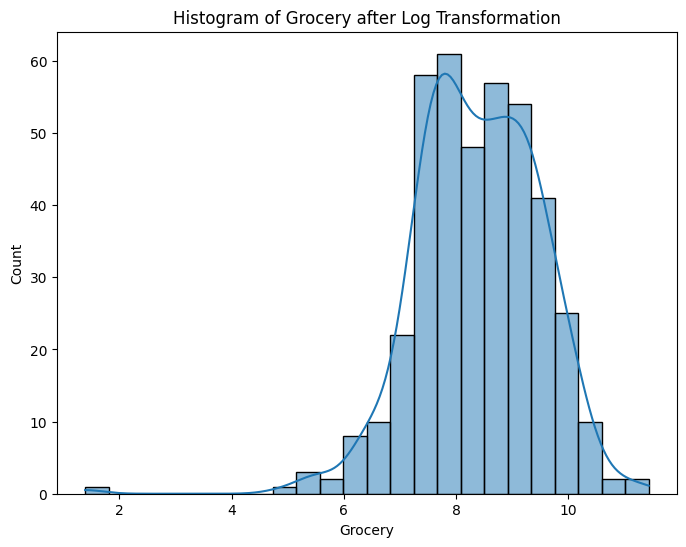

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


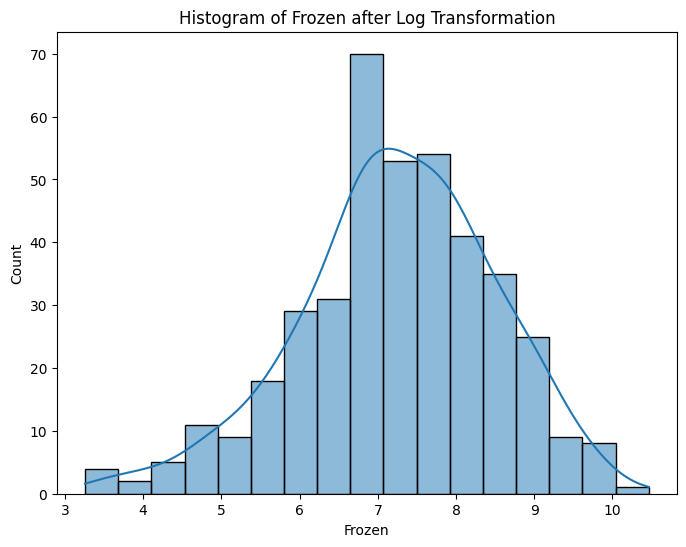

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


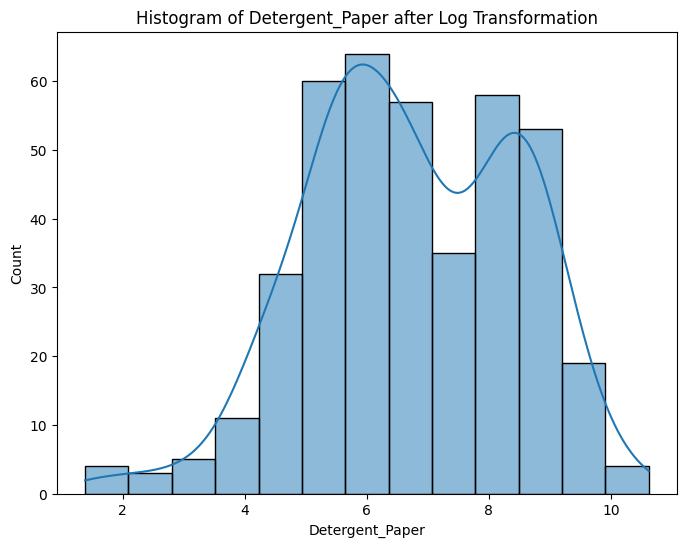

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


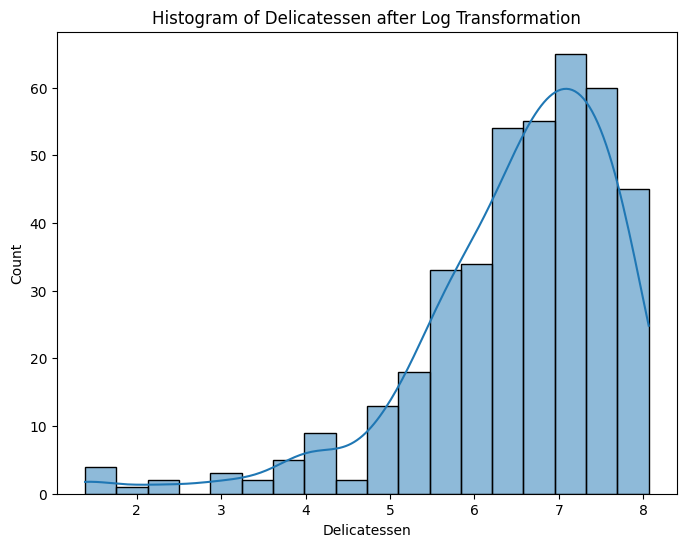

In [55]:
for column_name in filtered_data.columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(transformed_data[column_name], kde=True)
    plt.title(f"Histogram of {column_name} after Log Transformation")
    plt.show()

# Challenge 3 - Data Preprocessing

One problem with the dataset is the value ranges are remarkably different across various categories (e.g. `Fresh` and `Grocery` compared to `Detergents_Paper` and `Delicassen`). If you made this observation in the first challenge, you've done a great job! This means you not only completed the bonus questions in the previous Supervised Learning lab but also researched deep into [*feature scaling*](https://en.wikipedia.org/wiki/Feature_scaling). Keep on the good work!

Diverse value ranges in different features could cause issues in our clustering. The way to reduce the problem is through feature scaling. We'll use this technique again with this dataset.

#### We will use the `StandardScaler` from `sklearn.preprocessing` and scale our data. Read more about `StandardScaler` [here](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html#sklearn.preprocessing.StandardScaler).

*After scaling your data, assign the transformed data to a new variable `customers_scale`.*

In [56]:
# Your import here:

from sklearn.preprocessing import StandardScaler

# Your code here:
scaler = StandardScaler()
standardized_data = scaler.fit_transform(transformed_data)
customers_scale = pd.DataFrame(standardized_data, columns=transformed_data.columns)

# Challenge 4 - Data Clustering with K-Means

Now let's cluster the data with K-Means first. Initiate the K-Means model, then fit your scaled data. In the data returned from the `.fit` method, there is an attribute called `labels_` which is the cluster number assigned to each data record. What you can do is to assign these labels back to `customers` in a new column called `customers['labels']`. Then you'll see the cluster results of the original data.

In [61]:
# Your code here:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)

kmeans.fit(standardized_data)

customers_scale['labels'] = kmeans.labels_

/Users/amandabrognolidonini/Library/Python/3.10/lib/python/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [58]:
customers_scale.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergent_Paper,Delicatessen,labels
0,1.479519,0.574176,0.518132,1.095782,0.496697,-1.494186,0.677149,0.585828,2
1,1.479519,0.574176,0.113729,1.111003,0.709817,0.187947,0.798266,0.822978,2
2,-0.675895,0.574176,0.549904,-0.912908,-0.030982,1.219276,-0.289455,0.828618,1
3,1.479519,0.574176,0.312819,0.945449,0.144854,-0.589096,0.445342,0.653720,2
4,1.479519,0.574176,0.487856,0.033135,0.423670,-0.850452,0.770592,-0.165888,2


Count the values in `labels`.

In [59]:
# Your code here:
customers_scale['labels'].value_counts()

labels
1    167
2    132
0    106
Name: count, dtype: int64

# Challenge 5 - Data Clustering with DBSCAN

Now let's cluster the data using DBSCAN. Use `DBSCAN(eps=0.5)` to initiate the model, then fit your scaled data. In the data returned from the `.fit` method, assign the `labels_` back to `customers['labels_DBSCAN']`. Now your original data have two labels, one from K-Means and the other from DBSCAN.

In [62]:
# Your code here
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5)

dbscan.fit(standardized_data)

customers_scale['labels_DBSCAN'] = dbscan.labels_


Count the values in `labels_DBSCAN`.

In [63]:
# Your code here
customers_scale['labels_DBSCAN'].value_counts()

labels_DBSCAN
-1    405
Name: count, dtype: int64

# Challenge 6 - Compare K-Means with DBSCAN

Now we want to visually compare how K-Means and DBSCAN have clustered our data. We will create scatter plots for several columns. For each of the following column pairs, plot a scatter plot using `labels` and another using `labels_DBSCAN`. Put them side by side to compare. Which clustering algorithm makes better sense?

Columns to visualize:

* `Detergents_Paper` as X and `Milk` as y
* `Grocery` as X and `Fresh` as y
* `Frozen` as X and `Delicassen` as y

Visualize `Detergents_Paper` as X and `Milk` as y by `labels` and `labels_DBSCAN` respectively

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

Text(0.5, 1.0, 'DBSCAN: Detergent_Paper vs. Milk')

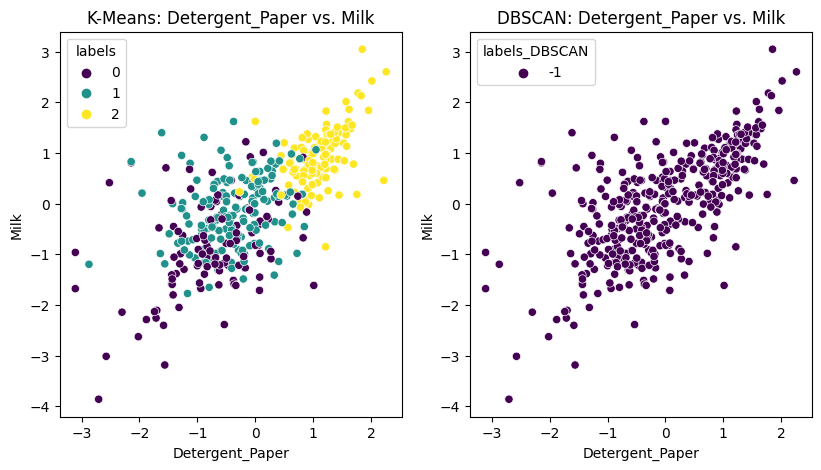

In [72]:
# Your code here:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Detergent_Paper', y='Milk', hue='labels', data=customers_scale, palette='viridis')
plt.title('K-Means: Detergent_Paper vs. Milk')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Detergent_Paper', y='Milk', hue='labels_DBSCAN', data=customers_scale, palette='viridis')
plt.title('DBSCAN: Detergent_Paper vs. Milk')

Visualize `Grocery` as X and `Fresh` as y by `labels` and `labels_DBSCAN` respectively

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

Text(0.5, 1.0, 'DBSCAN: Grocery vs. Fresh')

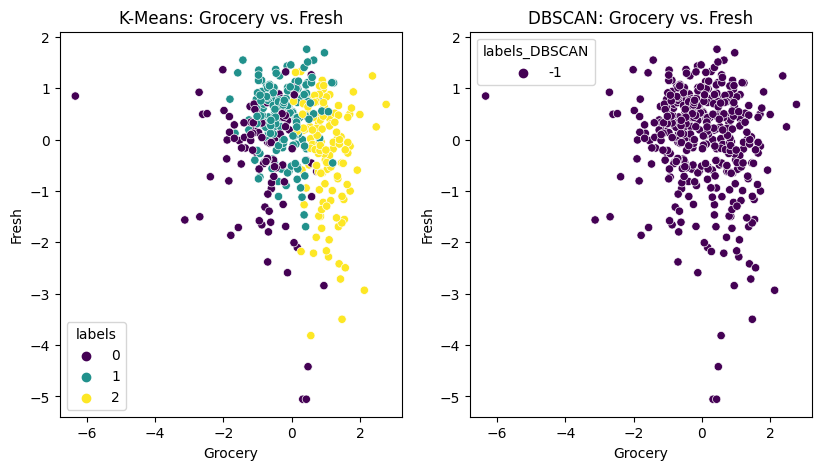

In [74]:
# Your code here:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Grocery', y='Fresh', hue='labels', data=customers_scale, palette='viridis')
plt.title('K-Means: Grocery vs. Fresh')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Grocery', y='Fresh', hue='labels_DBSCAN', data=customers_scale, palette='viridis')
plt.title('DBSCAN: Grocery vs. Fresh')

Visualize `Frozen` as X and `Delicassen` as y by `labels` and `labels_DBSCAN` respectively

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: 

Text(0.5, 1.0, 'DBSCAN: Frozen vs. Delicatessen')

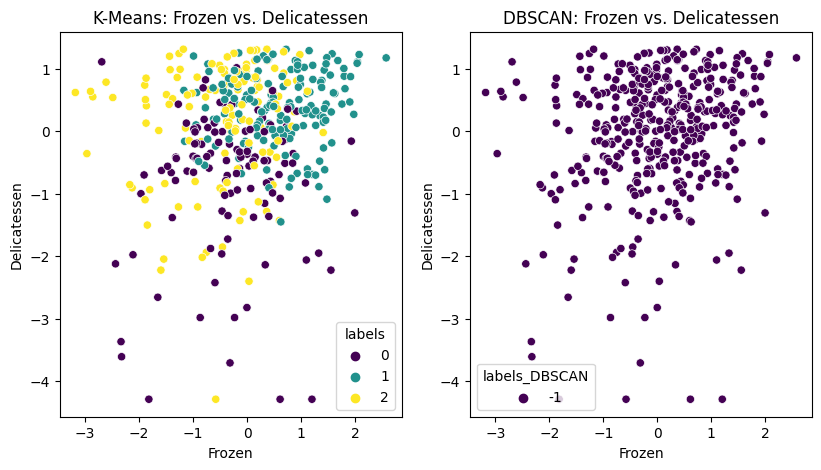

In [75]:
# Your code here:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='Frozen', y='Delicatessen', hue='labels', data=customers_scale, palette='viridis')
plt.title('K-Means: Frozen vs. Delicatessen')

plt.subplot(1, 3, 2)
sns.scatterplot(x='Frozen', y='Delicatessen', hue='labels_DBSCAN', data=customers_scale, palette='viridis')
plt.title('DBSCAN: Frozen vs. Delicatessen')

Let's use a groupby to see how the mean differs between the groups. Group `customers` by `labels` and `labels_DBSCAN` respectively and compute the means for all columns.

In [76]:
# Your code here:
means_kmeans = customers_scale.groupby('labels').mean()

means_dbscan = customers_scale.groupby('labels_DBSCAN').mean()

In [77]:
means_kmeans

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergent_Paper,Delicatessen,labels_DBSCAN
labels,,,,,,,,,
0,-0.675895,0.253409,-0.335576,-0.880571,-0.852320,-0.329881,-0.768097,-0.801002,-1.0
1,-0.637175,-0.250948,0.432259,-0.164210,-0.250041,0.580996,-0.381435,0.370794,-1.0
2,1.348888,0.113992,-0.277395,0.914876,1.000779,-0.470144,1.099378,0.174118,-1.0


In [78]:
means_dbscan

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergent_Paper,Delicatessen,labels
labels_DBSCAN,,,,,,,,,
-1,2.099829e-16,-2.009367e-16,-8.158083e-16,-4.961737e-16,3.846032e-16,-5.504513e-16,-3.762422e-16,-1.425472e-16,1.064198


Which algorithm appears to perform better?

In [ ]:
# Your observations here
#dbscan seems to perform better since there is no clear separation between the clusters created by the kmeans

# Bonus Challenge 1 - Changing K-Means Number of Clusters

As we mentioned earlier, we don't need to worry about the number of clusters with DBSCAN because it automatically decides that based on the parameters we send to it. But with K-Means, we have to supply the `n_clusters` param (if you don't supply `n_clusters`, the algorithm will use `8` by default). You need to know that the optimal number of clusters differs case by case based on the dataset. K-Means can perform badly if the wrong number of clusters is used.

In advanced machine learning, data scientists try different numbers of clusters and evaluate the results with statistical measures (read [here](https://en.wikipedia.org/wiki/Cluster_analysis#External_evaluation)). We are not using statistical measures today but we'll use our eyes instead. In the cells below, experiment with different number of clusters and visualize with scatter plots. What number of clusters seems to work best for K-Means?

In [ ]:
# Your code here

In [ ]:
# Your comment here

# Bonus Challenge 2 - Changing DBSCAN `eps` and `min_samples`

Experiment changing the `eps` and `min_samples` params for DBSCAN. See how the results differ with scatter plot visualization.

In [ ]:
# Your code here

In [ ]:
# Your comment here